In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.stats import wasserstein_distance  # Import Wasserstein distance

# Function to create the GAN
def build_gan(latent_dim):
    generator = models.Sequential([
        layers.Dense(128, input_shape=(latent_dim,), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X_train.shape[1], activation='sigmoid')  # Output layer
    ])

    discriminator = models.Sequential([
        layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # Output layer
    ])

    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)

    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return generator, discriminator, gan

# dataset loading
#df = pd.read_csv('/Users/farhatlamiabarsha/Downloads/archive/Fraud_Data.csv')
df = pd.read_csv('/Users/farhatlamiabarsha/Downloads/creditcard.csv')

# Preprocess data 
columns_to_drop = ['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28', ]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Split the dataset into dependent and independent variables
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Build and train the GAN
latent_dim = 100
generator, discriminator, gan = build_gan(latent_dim)

# Training the GAN
epochs = 10000
batch_size = 64

min_loss = float('inf')

# Lists to store generator and discriminator losses
generator_losses = []
discriminator_losses = []

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    generated_data = generator.predict(noise)
    
    idx_real = np.random.randint(0, X_train.shape[0], size=batch_size)
    real_data = X_train.iloc[idx_real]
    
    X_discriminator = np.concatenate([real_data, generated_data])
    y_discriminator = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    
    d_loss = discriminator.train_on_batch(X_discriminator, y_discriminator)
    
    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    y_generator = np.ones((batch_size, 1))
    
    g_loss = gan.train_on_batch(noise, y_generator)
    
    # Append losses to the lists
    generator_losses.append(g_loss[0])
    discriminator_losses.append(d_loss[0])
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss[0]}")
    
    if epoch > 10 and epoch % 10 == 0:
        current_loss = g_loss[0]  # You may adjust this based on your preference
        if current_loss > min_loss:
            print(f"Early stopping at epoch {epoch} due to lack of improvement.")
            break
        else:
            min_loss = current_loss 

# After GAN training
latent_dim = 100
generator, _, _ = build_gan(latent_dim)

# Generate synthetic data using the trained generator
num_samples = X_test.shape[0]
noise1 = np.random.normal(0, 1, size=[num_samples, latent_dim])
noise2 = np.random.normal(0, 1, size=[num_samples, latent_dim])

synthetic_data1 = generator.predict(noise1)
synthetic_data2 = generator.predict(noise2)

# Continue with the rest of your code...
# ...
# Generate synthetic data using the trained generator
num_samples = X_test.shape[0]
synthetic_data = generator.predict(np.random.normal(0, 1, size=[num_samples, latent_dim]))

# Combine real and synthetic data
X_combined = pd.concat([X_train, pd.DataFrame(synthetic_data, columns=X_train.columns)], ignore_index=True)
y_combined = pd.concat([y_train, pd.Series(np.zeros(num_samples), name='class')], ignore_index=True)

# Train model
fraud_detection_model = LogisticRegression()
fraud_detection_model.fit(X_combined, y_combined)

# Evaluate the model on the test set
y_pred = fraud_detection_model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


2024-01-25 11:20:31.335044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:31.431667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]


Epoch 0, Discriminator Loss: 1938.4002685546875, Generator Loss: 0.7333959341049194
2/2 [==============================] - 0s 1ms/step


2024-01-25 11:20:31.672424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:31.674611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:31.694342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 847us/step
Epoch 10, Discriminator Loss: 2573.83154296875, Generator Loss: 0.7464375495910645
2/2 [==============================] - 0s 872us/step


2024-01-25 11:20:31.963460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:31.965900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:31.985301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 947us/step
Epoch 20, Discriminator Loss: 3892.754638671875, Generator Loss: 0.7455511093139648
2/2 [==============================] - 0s 792us/step


2024-01-25 11:20:32.176625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:32.178683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:32.200098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 909us/step
Epoch 30, Discriminator Loss: 3122.70947265625, Generator Loss: 0.7303322553634644
2/2 [==============================] - 0s 879us/step


2024-01-25 11:20:32.393495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:32.395577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:32.413673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 825us/step
Epoch 40, Discriminator Loss: 1848.885009765625, Generator Loss: 0.7259767055511475
2/2 [==============================] - 0s 879us/step


2024-01-25 11:20:32.608312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:32.610523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:32.630297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 796us/step
Epoch 50, Discriminator Loss: 2532.46435546875, Generator Loss: 0.7336759567260742
Early stopping at epoch 50 due to lack of improvement.


2024-01-25 11:20:32.821332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:32.823379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-25 11:20:32.841849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

1781/1781 [==============================] - 0s 199us/step


/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Accuracy: 0.9982093325374811
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

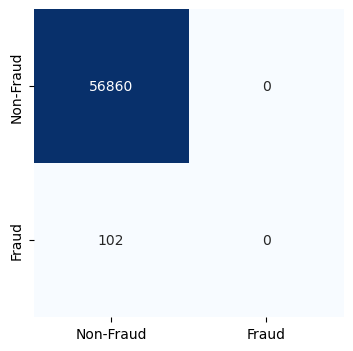

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

Accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", Accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [18]:
import pandas as pd

df = pd.read_csv('/Users/farhatlamiabarsha/Downloads/creditcard.csv')

# Select 100 random rows from the original dataset
new_dataset = df.sample(n=100, random_state=42)  

# Specify the file path where you want to save the new dataset
output_file_path = '/Users/farhatlamiabarsha/Downloads/new_dataset.csv'  

# Save the new dataset to a CSV file
new_dataset.to_csv(output_file_path, index=False)

print(f"New dataset saved to: {output_file_path}")

New dataset saved to: /Users/farhatlamiabarsha/Downloads/new_dataset.csv


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.stats import wasserstein_distance  # Import Wasserstein distance

# Function to create the GAN
def build_gan(latent_dim):
    generator = models.Sequential([
        layers.Dense(128, input_shape=(latent_dim,), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X_train.shape[1], activation='sigmoid')  # Output layer
    ])

    discriminator = models.Sequential([
        layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # Output layer
    ])

    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)

    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return generator, discriminator, gan

# dataset loading
#df = pd.read_csv('/Users/farhatlamiabarsha/Downloads/archive/Fraud_Data.csv')
df = pd.read_csv('/Users/farhatlamiabarsha/Downloads/new_dataset.csv')

# Preprocess data 
columns_to_drop = ['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28', ]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Split the dataset into dependent and independent variables
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Build and train the GAN
latent_dim = 100
generator, discriminator, gan = build_gan(latent_dim)

# Training the GAN
epochs = 10000
batch_size = 64

min_loss = float('inf')

# Lists to store generator and discriminator losses
generator_losses = []
discriminator_losses = []

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    generated_data = generator.predict(noise)
    
    idx_real = np.random.randint(0, X_train.shape[0], size=batch_size)
    real_data = X_train.iloc[idx_real]
    
    X_discriminator = np.concatenate([real_data, generated_data])
    y_discriminator = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    
    d_loss = discriminator.train_on_batch(X_discriminator, y_discriminator)
    
    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    y_generator = np.ones((batch_size, 1))
    
    g_loss = gan.train_on_batch(noise, y_generator)
    
    # Append losses to the lists
    generator_losses.append(g_loss[0])
    discriminator_losses.append(d_loss[0])
    
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss[0]}")
    
    if epoch > 10 and epoch % 10 == 0:
        current_loss = g_loss[0]  # You may adjust this based on your preference
        if current_loss > min_loss:
            print(f"Early stopping at epoch {epoch} due to lack of improvement.")
            break
        else:
            min_loss = current_loss 

# After GAN training
latent_dim = 100
generator, _, _ = build_gan(latent_dim)

# Generate synthetic data using the trained generator
num_samples = X_test.shape[0]
noise1 = np.random.normal(0, 1, size=[num_samples, latent_dim])
noise2 = np.random.normal(0, 1, size=[num_samples, latent_dim])

synthetic_data1 = generator.predict(noise1)
synthetic_data2 = generator.predict(noise2)

# Continue with the rest of your code...
# ...
# Generate synthetic data using the trained generator
num_samples = X_test.shape[0]
synthetic_data = generator.predict(np.random.normal(0, 1, size=[num_samples, latent_dim]))

# Combine real and synthetic data
X_combined = pd.concat([X_train, pd.DataFrame(synthetic_data, columns=X_train.columns)], ignore_index=True)
y_combined = pd.concat([y_train, pd.Series(np.zeros(num_samples), name='class')], ignore_index=True)

# Train model
fraud_detection_model = LogisticRegression()
fraud_detection_model.fit(X_combined, y_combined)

# Evaluate the model on the test set
y_pred = fraud_detection_model.predict(X_test)

2/2 [==============================] - 0s 965us/step


2024-01-24 23:57:23.133427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-24 23:57:23.227691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]


Epoch 0, Discriminator Loss: 8554.369140625, Generator Loss: 0.7539992332458496
2/2 [==============================] - 0s 884us/step


2024-01-24 23:57:23.458136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-24 23:57:23.460311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-24 23:57:23.480347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 955us/step
Epoch 10, Discriminator Loss: 6707.09765625, Generator Loss: 0.7622887492179871
2/2 [==============================] - 0s 953us/step


2024-01-24 23:57:23.661926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-24 23:57:23.664047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-24 23:57:23.683500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 735us/step
Epoch 20, Discriminator Loss: 7584.408203125, Generator Loss: 0.7547411322593689
2/2 [==============================] - 0s 898us/step


2024-01-24 23:57:23.870744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-24 23:57:23.872972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-24 23:57:23.893723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 868us/step
Epoch 30, Discriminator Loss: 6559.02734375, Generator Loss: 0.7699028253555298
Early stopping at epoch 30 due to lack of improvement.
1/1 [==============================] - 0s 7ms/step


2024-01-24 23:57:24.072127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-01-24 23:57:24.091856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-01-24 23:57:24.094187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]


Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

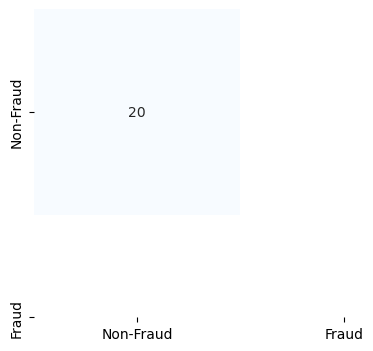

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

Accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", Accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)